In [1]:
#import necessary dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [3]:
#Load the data
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [10]:
# Ensure 'Category' is treated as categorical data
df['Category'] = df['Category'].astype('category')

In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

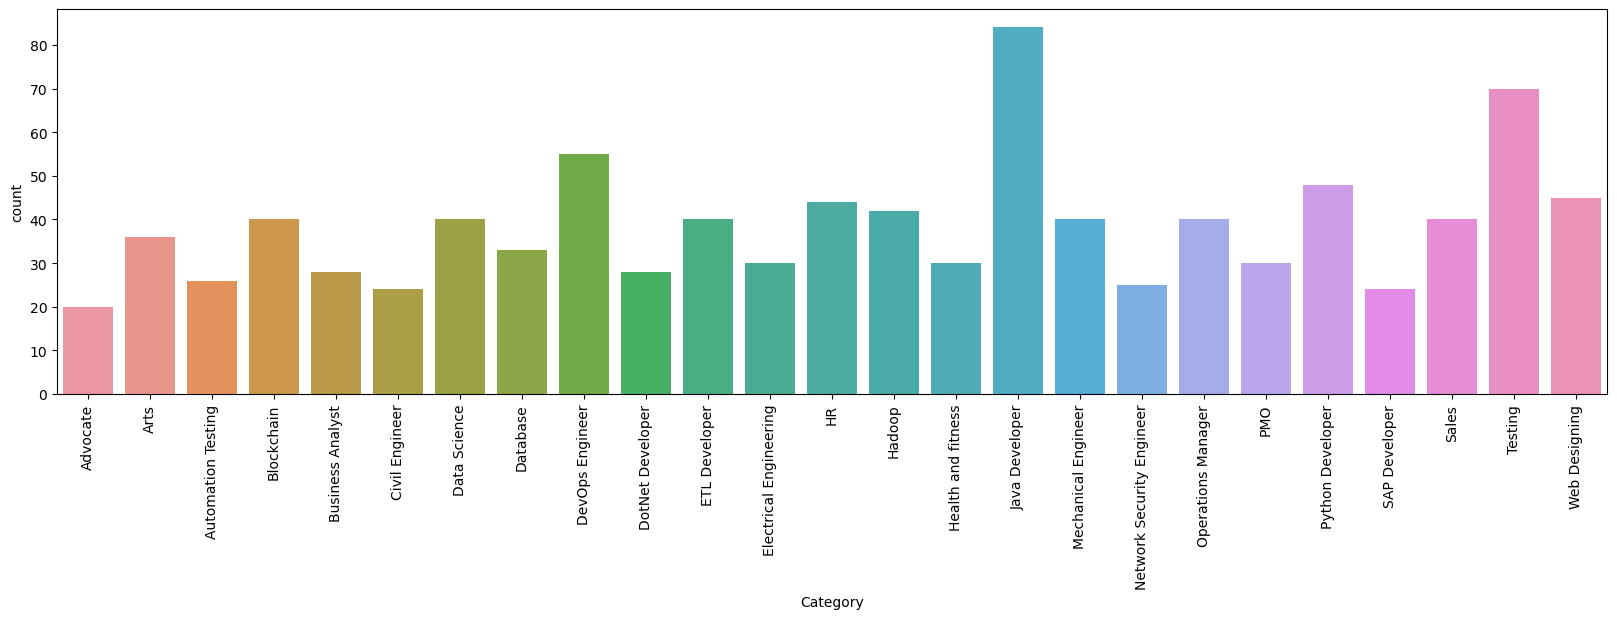

In [12]:
# Create the count plot
plt.figure(figsize=(20, 5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)  # Rotate the x labels if they are too long
plt.show()

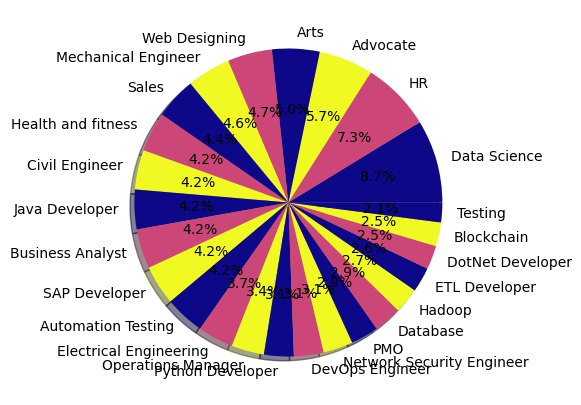

In [14]:
count = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(20, 5))
plt.pie(count,labels=labels,autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [15]:
#Data Preprocessing
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
#to remove urls, hashtags, mentions, special letters and puntuations
import re

def preprocess_data(text):
    
    preprocess_txt = re.sub('http\S+\s',' ',text)
    
    preprocess_txt = re.sub('@\S+',' ',preprocess_txt)
    
    preprocess_txt = re.sub('#\S+\s',' ',preprocess_txt)
    
    preprocess_txt = re.sub('RT|cc',' ',preprocess_txt)
    
    preprocess_txt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',preprocess_txt)
    
    preprocess_txt = re.sub(r'[^\x00-\x7f]',' ',preprocess_txt)
    
    preprocess_txt = re.sub('\s+',' ',preprocess_txt)
    
    return preprocess_txt

In [18]:
df['Resume'] = df['Resume'].apply(lambda x: preprocess_data(x))

In [19]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [39]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [21]:
#words into categorical value

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['Category'])

df['Category'] = le.transform(df['Category'])

In [23]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [26]:
#vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english')

tf.fit(df['Resume'])

transformed_txt = tf.transform(df['Resume'])

In [29]:
#split and train data 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_txt,df['Category'],random_state=42,test_size=0.3)

In [30]:
x_train.shape

(673, 7351)

In [31]:
x_test.shape

(289, 7351)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

kn = OneVsRestClassifier(KNeighborsClassifier())

kn.fit(x_train,y_train)

y_pred = kn.predict(x_test)

print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12
 14  9 15  4  0 20 16  7  8 23  3 23  9  6  0  6  9 14 15 24  9  3  1 15
 13  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10
 23 13  2 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23
  4]


In [35]:
#Evaluation of knn model

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      0.82      0.90        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        12
          17       1.00    

In [37]:
#to load trained classifier

import pickle

pickle.dump(tf,open('tf.pkl','wb'))
pickle.dump(kn,open('kn.pkl','wb'))

In [40]:
#to load trained classifier

import pickle
kn_pkl = pickle.load(open('kn.pkl','rb'))